In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

## EDA

In [3]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [4]:
X = pd.concat([train_data.drop(columns=['SalePrice']),test_data],ignore_index=True)

In [5]:
# drop 'SalePrice'
X = pd.concat([train_data.drop(columns=['SalePrice']),test_data],ignore_index=True)

missing values: 15707


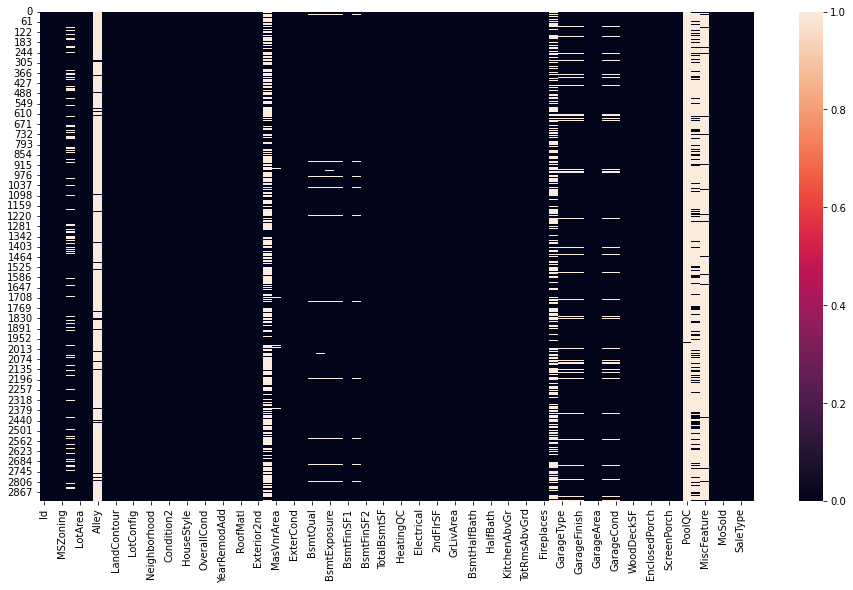

In [6]:
# check missing values
print(f"missing values: {X.isnull().values.sum()}")
plt.figure(figsize=(16,9))
sns.heatmap(X.isnull())
plt.show()

In [7]:
#calculate the percentage of null values in the columns
null_percent = X.isnull().sum()/X.shape[0]*100
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
Length: 80, dtype: float64

In [8]:
# deleting the columns with more than 50 missing values
col_to_drop = null_percent[null_percent > 50].keys()
col_to_drop

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [9]:
X = X.drop(columns=list(col_to_drop))

In [10]:
# check new shape
X.shape

(2919, 75)

In [11]:
# feature engineering
numerical_cols = X.loc[:, X.isnull().any()].select_dtypes(include='number').columns
categorical_cols = X.loc[:, X.isnull().any()].select_dtypes(exclude='number').columns

print("Numerical columns with null values:", numerical_cols)
print("Categorical columns with null values:", categorical_cols)

Numerical columns with null values: Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')
Categorical columns with null values: Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')


In [12]:
for column in numerical_cols:
    # Replace missing values with the mean
    X[column] = X[column].fillna(X[column].mean())

In [13]:
for column in categorical_cols:
    # Replace missing values with the mode
    X[column] = X[column].fillna(X[column].mode()[0])

In [14]:
if not X.isnull().values.any():
    print("\nThere are no missing values.")


There are no missing values.


In [15]:
# One-hot encoding
print(X.shape)
X = pd.get_dummies(data=X)
print(X.shape)

(2919, 75)
(2919, 272)


In [21]:
test_data_transform = X.iloc[train_data.shape[0]:].copy()
X = X.iloc[:train_data.shape[0]].copy()

In [22]:
# independent variables and target
X = X.drop(columns=['Id'])
y = train_data['SalePrice']
print(X.shape)
print(y.shape)

(1460, 271)
(1460,)


/var/folders/x3/914g3z3n6p375ndfhpljnmhm0000gq/T/ipykernel_40929/3787042043.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(train_data['SalePrice'])


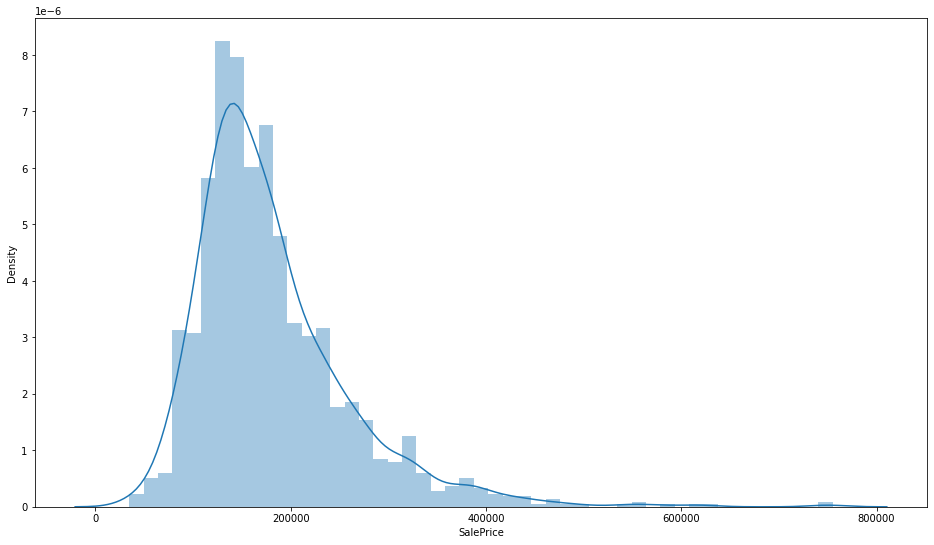

In [23]:
# check distribution target value
plt.figure(figsize=(16,9))
bar = sns.distplot(train_data['SalePrice'])
plt.show()

In [24]:
# Log-transform the target variable
y_log = np.log(y)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [26]:
print (X_train.shape)
print (X_test.shape)

(1168, 271)
(292, 271)


# Random Forest

In [27]:
# Build the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [28]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(np.log(y_test),np.log(y_test_pred_rf)))
rounded_rmse_rf = round(rmse_rf, 4)
print(f'Root Mean Squared Error on test Set (Random Forest): {rounded_rmse_rf}')


Root Mean Squared Error on test Set (Random Forest): 0.1541


In [31]:
test_X = test_data_transform.drop('Id', axis=1)
test_X_scaled = scaler.transform(test_X)
test_preds_rf = rf_model.predict(test_X_scaled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [32]:
# Save the predictions to a CSV file
result = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.exp(test_preds_rf)})
result.to_csv('inference.csv', index=False)

/var/folders/x3/914g3z3n6p375ndfhpljnmhm0000gq/T/ipykernel_40929/767484919.py:2: RuntimeWarning: overflow encountered in exp
  result = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': np.exp(test_preds_rf)})
